
## Waste Management using CNN Model


In [4]:
pip install opencv.python


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [8]:
train_path = "DATASET/DATASET/TRAIN"
train_path = "DATASET/DATASET/TEST"

In [9]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob 


In [10]:
#visualisation
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})        

  0%|          | 0/1401 [00:00<?, ?it/s]

100%|██████████| 1112/1112 [00:02<00:00, 549.06it/s]


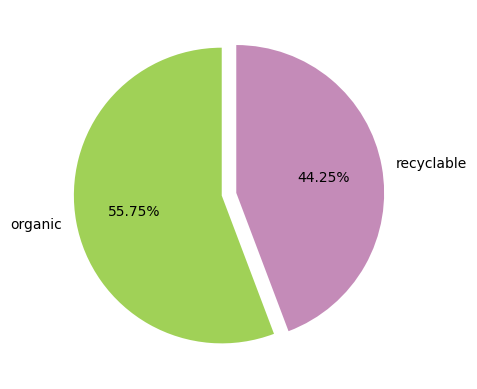

In [11]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','recyclable'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])
plt.show()